<a href="https://colab.research.google.com/github/monica-carlotti/Machine-Learning/blob/main/Crop_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science for Global Agriculture, Food and Environment - Harper Adams University*

*Module: Techniques in Machine Learning and Artificial Intelligence*

Monica Carlotti 🌱🐝

# **Deep Learning for Precision Crop Type Classification**

Crop Type Classification with VGG16 Convolutional Neural Network

# Background


As our global population continues to grow, it becomes increasingly crucial to enhance agricultural practices for the sake of global food security. One impactful way to achieve this is through the integration of computer classification in various aspects of traditional farming such as crop monitoring, disease detection and yield prediction.

By employing computer vision systems, we can identify different plant species but also train models to distinguish between crops and weeds. This empowers farmers with targeted and timely interventions, all without the need for labor-intensive manual inspections of the fields.

The introduction of precision agriculture, facilitated by computer vision, brings about greater efficiency and a substantial reduction in labor-intensive manual work.

# Introduction



In addressing the critical challenge of agricultural crop classification, this research taps into existing studies highlighting the urgency for cutting-edge tech in farming precision farming (1). The idea is to step up crop monitoring for sustainable agriculture, emphasizing the accurate identification of key crops. This study aims to contribute to the realm of agriculture by classifying three fundamental crop types: maize, wheat, and rice.
By utilizing VGG16, a well-established deep learning architecture, I hope to enhance the accuracy and efficiency of crop classification in support of informed decision-making for farmers and sustainable agricultural practices.

In the initial phase of this study, a collection of images is acquired through web scraping, followed by normalization and resizing to ensure uniformity. Subsequently, the dataset undergoes division into two distinct sets: a training set, for model training, and a testing set, crucial for evaluating model performance.
Upon the completion of model training, a secondary evaluation is conducted using an external dataset. This external dataset serves as an additional measure to assess the model's robustness.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread

import plotly.express as px
import shutil
import random
from google.colab import files


In [2]:
!pip install plotly

## Load repository

In [3]:
!git clone https://github.com/monica-carlotti/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 447, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 447 (delta 4), reused 101 (delta 1), pack-reused 339
Receiving objects: 100% (447/447), 42.17 MiB | 37.85 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [4]:
cd Machine-Learning

/content/Machine-Learning


In [5]:
ls

crops/  maize/  README.md  rice/  Validation/  wheat/


## Image web scraping

The following code snippet illustrates the process used to scrape images from Pixabay, loading the folder to my Google Drive and upload to my GitHub. The process was repeated for three crop types, maize, wheat and rice, to get approximately 80 images for each.
The code has been disabled by adding # at the beginning of each line as the images have already been downloaded and uploaded to my GitHub.
For the code to run, a new private Pixabay_API_key needs to be generated.

In [6]:
# !pip install requests
# !pip install pillow

# import requests
# import json
# from PIL import Image
# from io import BytesIO
# from google.colab import drive

# PIXABAY_API_KEY = ''  # My private key, remove before uploading to github
# query = 'maize crop'
# image_count = 5  # Number of images to retrieve, just to try

# Pixabay API endpoint
# url = f'https://pixabay.com/api/?key={PIXABAY_API_KEY}&q={query}&image_type=photo&per_page={image_count}'

# Mount Google Drive
# drive.mount('/content/drive')

# Specify the new Google Drive folder location
# new_drive_folder = '/content/drive/MyDrive/Maize/'

# try:
    # Make the API request
    # response = requests.get(url)
    # response.raise_for_status()

    # Parse the JSON response
    # data = response.json()

    # Download and save images to the new Google Drive folder location and GitHub repository
    # for hit in data.get('hits', []):
       #  image_url = hit.get('largeImageURL')
       # image_response = requests.get(image_url)

        # Save image to the new Google Drive folder location
        # img = Image.open(BytesIO(image_response.content))
        # img.save(os.path.join(new_drive_folder, f'pixabay_image_{hit["id"]}.jpg'))


Scraped images from the web for three crops (maize, wheat and rice) and uploaded on my GitHub repository in one folder 'Crops'.

## Pre-processing the images

The 'Crops' folder in my GitHub repository contains images of three crop types which have been scraped according to the method shown above.


First I want to check the total number of images in my 'Crops' folder.

In [7]:
# Path to my cloned GitHub repository
repo_path = '/content/Machine-Learning'

# Folder containing images
input_folder = os.path.join(repo_path, 'crops')

# List image files in the folder
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Print
print("The total number of images is:", len(image_files))


The total number of images is: 245


 I want to make sure that the folder is loaded correctly and that the images are present. The next code snipper will check and display one image for each crop type.

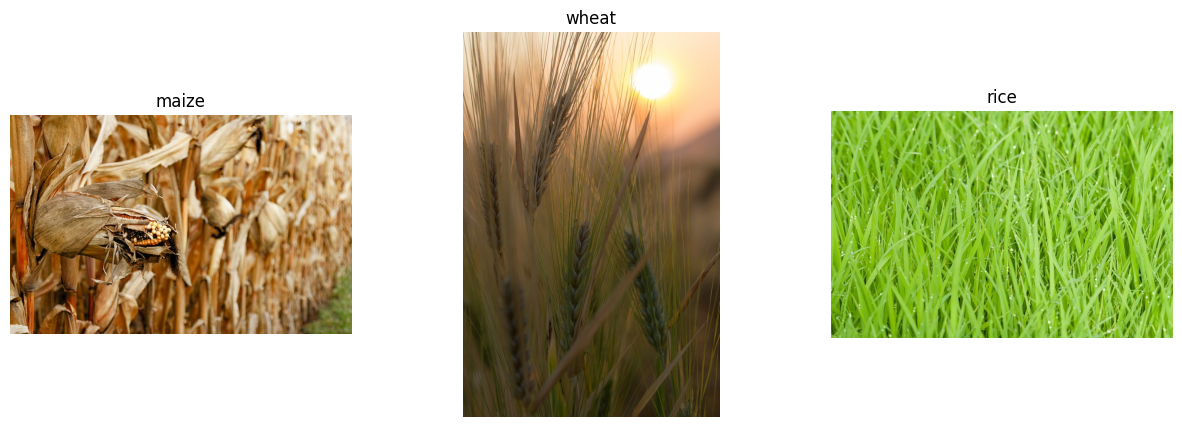

In [8]:
# Path to my GitHub repository
repo_path = '/content/Machine-Learning'

# Folder containing images
input_folder = os.path.join(repo_path, 'crops')

# List image files in the folder
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Dictionary to store example images for each crop type
crop_images = {}

# Load and store one example image for each crop type
for img_file in image_files:
    crop_type = img_file.split('(')[0].strip()  # Extract crop type from file name
    if crop_type not in crop_images:
        img_path = os.path.join(input_folder, img_file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        crop_images[crop_type] = image

# Display one example image for each crop type using Matplotlib
fig, axes = plt.subplots(1, len(crop_images), figsize=(15, 5))

for i, (crop_type, image) in enumerate(crop_images.items()):
    axes[i].imshow(image)
    axes[i].set_title(crop_type)
    axes[i].axis('off')

plt.show()


My total number of images is 245 and the example images correspond to their classes. However, they have different sizes, which I will need to edit.
Next, I want ensure that there is a balance in the number of images for each crop type therefore I visualise class distribution for my dataset.


In [9]:
# Path to my GitHub repository
repo_path = '/content/Machine-Learning'

# Folder containing images
input_folder = os.path.join(repo_path, 'crops')

# List image files in the folder
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Extract class names from filenames
class_names = [filename.split('(')[0].strip() for filename in image_files]

# Count occurrences of each class
class_counts = {class_name: class_names.count(class_name) for class_name in set(class_names)}

# Print the number of images in each class
for class_name, count in class_counts.items():
    print(f"Number of images in {class_name}: {count}")

# Visualize class distribution
fig = px.pie(
    names=list(class_counts.keys()),
    values=list(class_counts.values()),
    title='Crop Distribution',
    hole=0.3
)
fig.show()


Number of images in rice: 73
Number of images in wheat: 83
Number of images in maize: 89


The images are similarly distributed, however the total number of images is fairly low.
Now I will resize, normalize and augment the images.
First, the code processes and lists all images from the 'crops' folder.
They are resized and normalized to a size of 256, 256.
Next, augmentation is applied to each image in the folder. The folder is then downloaded to check contents and ensure the success of the augmentation. The download part of the code has now been blocked out by adding #.

In [10]:
# Path to my GitHub repository
repo_path = '/content/Machine-Learning'

# Folder containing images
input_folder = os.path.join(repo_path, 'crops')

# List all files in the folder
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Resize and normalize images, then save them to a new folder
output_folder = os.path.join(repo_path, 'resized_crops')
os.makedirs(output_folder, exist_ok=True)

for img_file in image_files:
    img_path = os.path.join(input_folder, img_file)
    img = cv2.imread(img_path)

    # Resize the image
    resized_img = cv2.resize(img, (256, 256))

    # Normalize pixel values to [0, 1]
    normalized_img = resized_img / 255.0

    # Save the normalized and resized image to the output folder
    cv2.imwrite(os.path.join(output_folder, img_file), (normalized_img * 255).astype(int))

# check that the resized images are created before augmentation
if os.path.exists(output_folder) and os.path.isdir(output_folder):
    # Create an ImageDataGenerator for augmentation
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    # Set the number of augmented images
    num_augmented_images = 2

    # Iterate through each image in the folder
    for img_file in os.listdir(output_folder):
        img_path = os.path.join(output_folder, img_file)

        # Read the image
        img = cv2.imread(img_path)

        # Reshape the image
        img = img.reshape((1,) + img.shape)

        # Generate augmented images
        augmented_images = [next(datagen.flow(img, batch_size=1))[0].astype('uint8') for _ in range(num_augmented_images)]

        # Save the augmented images to the folder
        for i, augmented_img in enumerate(augmented_images):
            unique_identifier = f'{i}_{random.randint(1, 100000)}'
            augmented_file_path = os.path.join(output_folder, f'aug {unique_identifier} {img_file}')
            cv2.imwrite(augmented_file_path, augmented_img)

    # Zip folder
    shutil.make_archive('resized_crops_augmented', 'zip', repo_path, 'resized_crops')

    # Download the zip file - remove # to run
    # files.download('resized_crops_augmented.zip')

The process and the download worked (remove # to download), I now want to check the number of images in my new resized-augmented folder.

In [11]:
# Path to the output folder
output_folder = '/content/Machine-Learning/resized_crops'

# List files in the folder
image_files = [f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))]

# Count
num_images = len(image_files)

print(f"Number of images in the output folder: {num_images}")


Number of images in the output folder: 735


The folder now contains 735 images, as I selected 2 augmented images for each input image. I want to see how well my augmentation worked on the images, so I want to see the results of the augmentation on a random selection of 36 images.

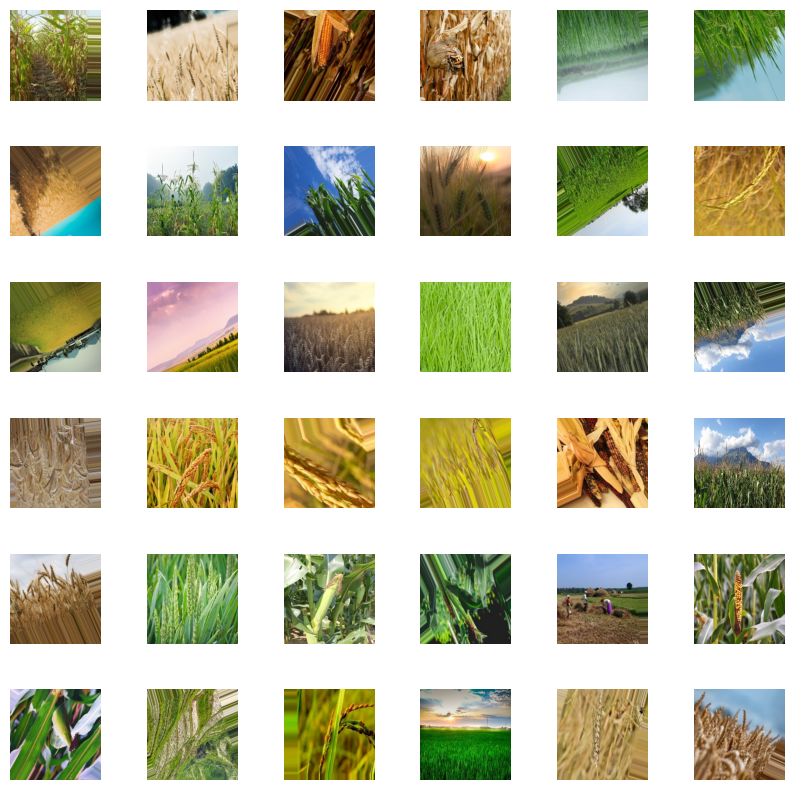

In [12]:
# Path to the output folder
output_folder = '/content/Machine-Learning/resized_crops'

# List all image files in the folder
image_files = [f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))]

# Select the first 36 images
selected_images = image_files[:36]

# Create a 6x6 grid
fig, axs = plt.subplots(6, 6, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Display image in the grid
for i, image_file in enumerate(selected_images):
    img_path = os.path.join(output_folder, image_file)
    img = mpimg.imread(img_path)
    axs[i // 6, i % 6].imshow(img)
    axs[i // 6, i % 6].axis('off')

plt.show()


The augmentation images are satisfactory. Now I want to check the filenames in my new augmented folder and and modify them if needed to facilitate labelling.

In [13]:
# Path to the resized folder
output_folder = '/content/Machine-Learning/resized_crops'

# List all image files in the folder
image_files = [f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))]

# Display the first 10 files
for i, img_file in enumerate(image_files[:15]):
    print(f"{i + 1}. {img_file}")


1. aug 0_92757 maize (8).jpg
2. aug 1_14981 wheat (44).jpg
3. aug 1_9912 maize (52).jpg
4. maize (34).jpg
5. aug 0_2756 rice (8).jpg
6. aug 0_26764 rice (50).jpg
7. aug 0_52470 wheat (38).jpg
8. maize (54).jpg
9. aug 0_83365 maize (9).jpg
10. wheat (11).jpg
11. aug 1_9742 rice (63).jpg
12. aug 0_29331 rice (15).jpg
13. aug 1_92783 rice (23).jpg
14. aug 0_88722 wheat (68).jpg
15. aug 0_50932 wheat (85).jpg


The augmented filenames have been rightfully renamed with "aug - unique identifier - type of crop". I will now extract the crop type according to the filename.

In [14]:
# path to  images folder
output_folder = '/content/Machine-Learning/resized_crops'

# List files in the folder
image_files = os.listdir(output_folder)

# Extract class information from filenames
classes = [file.split()[2] if len(file.split()) >= 3 else file.split()[0] for file in image_files]

# Display
for filename, class_label in zip(image_files, classes):
    print(f"{filename}: {class_label}")


aug 0_92757 maize (8).jpg: maize
aug 1_14981 wheat (44).jpg: wheat
aug 1_9912 maize (52).jpg: maize
maize (34).jpg: maize
aug 0_2756 rice (8).jpg: rice
aug 0_26764 rice (50).jpg: rice
aug 0_52470 wheat (38).jpg: wheat
maize (54).jpg: maize
aug 0_83365 maize (9).jpg: maize
wheat (11).jpg: wheat
aug 1_9742 rice (63).jpg: rice
aug 0_29331 rice (15).jpg: rice
aug 1_92783 rice (23).jpg: rice
aug 0_88722 wheat (68).jpg: wheat
aug 0_50932 wheat (85).jpg: wheat
rice (5).jpg: rice
aug 0_29711 wheat (16).jpg: wheat
aug 1_94831 maize (36).jpg: maize
aug 0_43777 wheat (92).jpg: wheat
rice (41).jpg: rice
aug 0_63963 rice (71).jpg: rice
aug 0_51502 rice (13).jpg: rice
aug 1_6108 maize (25).jpg: maize
maize (36).jpg: maize
aug 1_53861 wheat (21).jpg: wheat
wheat (51).jpg: wheat
maize (2).jpg: maize
aug 0_65483 maize (35).jpg: maize
aug 1_23041 rice (49).jpg: rice
maize (47).jpg: maize
aug 0_7873 maize (26).jpg: maize
aug 1_14670 rice (47).jpg: rice
aug 1_96051 rice (46).jpg: rice
rice (69).jpg: rice


The type of crop has been correctly extracted from the filename for both augmented and 'original' images of the dataset.

I now want to split according to file name, meaning that augmented images go to the training set, whilst original images go to testing set.

In [15]:
# path to images folder
output_folder = '/content/Machine-Learning/resized_crops'

# List all files in the folder
image_files = os.listdir(output_folder)

# Separate file names based on the presence of "aug"
training_set = [file for file in image_files if "aug" in file]
testing_set = [file for file in image_files if "aug" not in file]

# Print
print("Training set:", training_set)
print("Testing set:", testing_set)

print("\nNumber of files in training set:", len(training_set))
print("Number of files in testing set:", len(testing_set))

Training set: ['aug 0_92757 maize (8).jpg', 'aug 1_14981 wheat (44).jpg', 'aug 1_9912 maize (52).jpg', 'aug 0_2756 rice (8).jpg', 'aug 0_26764 rice (50).jpg', 'aug 0_52470 wheat (38).jpg', 'aug 0_83365 maize (9).jpg', 'aug 1_9742 rice (63).jpg', 'aug 0_29331 rice (15).jpg', 'aug 1_92783 rice (23).jpg', 'aug 0_88722 wheat (68).jpg', 'aug 0_50932 wheat (85).jpg', 'aug 0_29711 wheat (16).jpg', 'aug 1_94831 maize (36).jpg', 'aug 0_43777 wheat (92).jpg', 'aug 0_63963 rice (71).jpg', 'aug 0_51502 rice (13).jpg', 'aug 1_6108 maize (25).jpg', 'aug 1_53861 wheat (21).jpg', 'aug 0_65483 maize (35).jpg', 'aug 1_23041 rice (49).jpg', 'aug 0_7873 maize (26).jpg', 'aug 1_14670 rice (47).jpg', 'aug 1_96051 rice (46).jpg', 'aug 0_82725 wheat (80).jpg', 'aug 1_33538 wheat (78).jpg', 'aug 1_22227 rice (43).jpg', 'aug 1_23687 rice (2).jpg', 'aug 1_22469 maize (67).jpg', 'aug 1_14288 maize (53).jpg', 'aug 1_66897 wheat (61).jpg', 'aug 0_54759 maize (14).jpg', 'aug 0_46786 wheat (64).jpg', 'aug 1_74295 whe

This code extracts class information from the filenames and splits the data into training and testing sets based on the presence of "aug" in the filenames. The training set contains 490 augmented images, the testing set contains 245 original images.
The images are moved into separate folders and I want to double check if the split was successful.

In [16]:
# Create folders for the two sets
training_set_folder = '/content/Machine-Learning/training_set'
testing_set_folder = '/content/Machine-Learning/testing_set'

# Create the folders if they don't exist
os.makedirs(training_set_folder, exist_ok=True)
os.makedirs(testing_set_folder, exist_ok=True)

# Move files to the training set folder
for filename in training_set:
    src_path = os.path.join(output_folder, filename)
    dst_path = os.path.join(training_set_folder, filename)
    shutil.move(src_path, dst_path)

# Move files to the testing set folder
for filename in testing_set:
    src_path = os.path.join(output_folder, filename)
    dst_path = os.path.join(testing_set_folder, filename)
    shutil.move(src_path, dst_path)

print("Files moved successfully.")

Files moved successfully.


The split was successful and the folders contain the right images.

Starting with the Training set folder, I now want to apply label encoding and one-hot encoding. The label encoding is used to convert crop types (maize, wheat, rice) into numerical values, and then one-hot encoding is applied to represent these numerical values in a binary format.

In [17]:
# path to training set folder
training_set_folder = '/content/Machine-Learning/training_set'

# List all files in the training set folder
image_files = os.listdir(training_set_folder)

# Extract crop type information from filenames
crop_types = [file.split()[2] if len(file.split()) >= 3 else file.split()[0] for file in image_files]

# Create a DataFrame with image names and corresponding crop types
df = pd.DataFrame({"Image": image_files, "CropType": crop_types})

# One-hot encode the crop types
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[["CropType"]])

# Add one-hot encoded columns to the DataFrame
df_encoded = pd.concat([df, pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["CropType"]))], axis=1)

# Load and preprocess the images
images = []
for image_file in df["Image"]:
    image_path = os.path.join(training_set_folder, image_file)
    img = load_img(image_path, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array /= 255.0
    images.append(img_array)

X_train = np.array(images)
y_train = df_encoded.iloc[:, 2:].values

# Display
print(df_encoded)


                          Image CropType  CropType_maize  CropType_rice  \
0     aug 0_92757 maize (8).jpg    maize             1.0            0.0   
1    aug 1_14981 wheat (44).jpg    wheat             0.0            0.0   
2     aug 1_9912 maize (52).jpg    maize             1.0            0.0   
3       aug 0_2756 rice (8).jpg     rice             0.0            1.0   
4     aug 0_26764 rice (50).jpg     rice             0.0            1.0   
..                          ...      ...             ...            ...   
485  aug 0_97005 wheat (23).jpg    wheat             0.0            0.0   
486   aug 1_96937 rice (56).jpg     rice             0.0            1.0   
487   aug 1_75487 maize (3).jpg    maize             1.0            0.0   
488   aug 1_6025 maize (41).jpg    maize             1.0            0.0   
489   aug 0_78073 wheat (8).jpg    wheat             0.0            0.0   

     CropType_wheat  
0               0.0  
1               1.0  
2               0.0  
3          

The encoding of the Training folder set was successful. I now want to double check it with printing the shapes of the X_train and y_train, as well as the first sample for visual inspection.

In [18]:
# Print the shapes of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Print the first entry in X_train and y_train for visual inspection
print("X_train sample:")
print(X_train[:1])  # Print the first sample
print("y_train sample:")
print(y_train[:1])  # Print the corresponding label


X_train shape: (490, 256, 256, 3)
y_train shape: (490, 3)
X_train sample:
[[[[0.41568628 0.48235294 0.26666668]
   [0.43137255 0.5019608  0.27450982]
   [0.4509804  0.5058824  0.26666668]
   ...
   [0.8509804  0.92941177 0.9254902 ]
   [0.8509804  0.92941177 0.9254902 ]
   [0.8509804  0.92941177 0.9254902 ]]

  [[0.41568628 0.48235294 0.27058825]
   [0.43137255 0.49803922 0.28235295]
   [0.44705883 0.50980395 0.26666668]
   ...
   [0.8509804  0.92941177 0.9254902 ]
   [0.8509804  0.92941177 0.9254902 ]
   [0.8509804  0.92941177 0.9254902 ]]

  [[0.41568628 0.48235294 0.2784314 ]
   [0.43137255 0.49803922 0.28627452]
   [0.44705883 0.5058824  0.27450982]
   ...
   [0.8509804  0.92941177 0.9254902 ]
   [0.8509804  0.92941177 0.9254902 ]
   [0.8509804  0.92941177 0.9254902 ]]

  ...

  [[0.2901961  0.27058825 0.04313726]
   [0.3137255  0.29803923 0.04705882]
   [0.3647059  0.36862746 0.0627451 ]
   ...
   [0.41960785 0.47843137 0.25490198]
   [0.42352942 0.48235294 0.25882354]
   [0.42352

X_train sample shows the pixel values of the first image in the training set. It's a 256x256 RGB image, where each pixel is represented by three values ranging from 0 to 1 after normalization.

y_train sample represents the corresponding label for the first image. In this case, it's a one-hot encoded label for the crop type.

I now want to visualise a few examples to make sure that the images and the labels are correctly aligned for the training set.

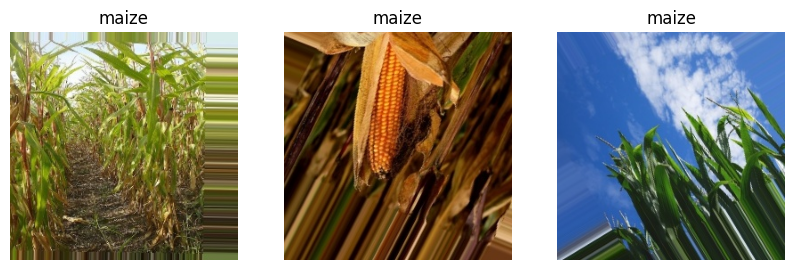

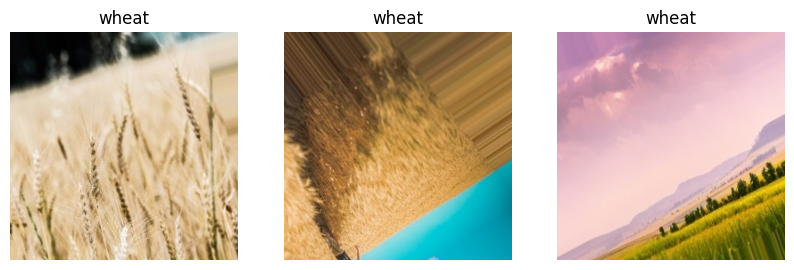

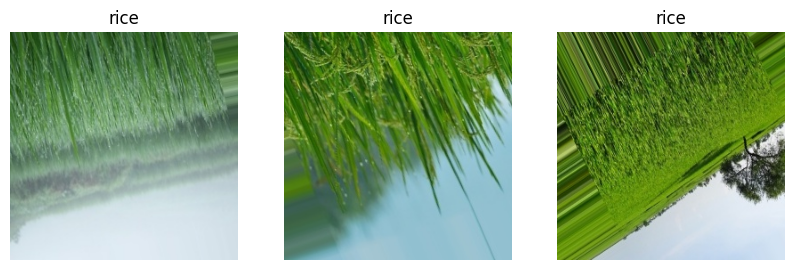

In [19]:
# path to training set folder
training_set_folder = '/content/Machine-Learning/training_set'

# List all files in the training set folder
image_files_training = os.listdir(training_set_folder)

# Extract crop type information from filenames
crop_types_training = [file.split()[2] if len(file.split()) >= 3 else file.split()[0] for file in image_files_training]

# Create a DataFrame with image names and corresponding crop types
df_training = pd.DataFrame({"Image": image_files_training, "CropType": crop_types_training})

# List of unique crop types
unique_crop_types_training = df_training['CropType'].unique()

# Visualize 3 images from each class in the training set
num_images_per_class = 3
for crop_type in unique_crop_types_training:
    # Filter images for the current crop type
    crop_type_images = df_training[df_training['CropType'] == crop_type]['Image'][:num_images_per_class]

    # Plot the images
    plt.figure(figsize=(10, 4))
    for i, image_file in enumerate(crop_type_images):
        plt.subplot(1, num_images_per_class, i + 1)
        img_path = os.path.join(training_set_folder, image_file)
        img = imread(img_path)
        plt.imshow(img)
        plt.title(f'{crop_type}')
        plt.axis('off')
    plt.show()


The training set contains only the augmented images and it has been successfully labeled.

-----

I will now repeat the same process for the testing set folder.

In [20]:
# path to testing set folder
testing_set_folder = '/content/Machine-Learning/testing_set'

# List all files in the testing set folder
image_files_testing = os.listdir(testing_set_folder)

# Extract crop type information from filenames
crop_types_testing = [file.split()[0] for file in image_files_testing]

# Create a DataFrame with image names and corresponding crop types
df_testing = pd.DataFrame({"Image": image_files_testing, "CropType": crop_types_testing})

# One-hot encode the crop types (using the same encoder as the training set)
one_hot_encoded_testing = encoder.transform(df_testing[["CropType"]])

# Add one-hot encoded columns to the DataFrame
df_encoded_testing = pd.concat([df_testing, pd.DataFrame(one_hot_encoded_testing, columns=encoder.get_feature_names_out(["CropType"]))], axis=1)

# Load and preprocess the images for the testing set
images_testing = []
for image_file in df_testing["Image"]:
    image_path_testing = os.path.join(testing_set_folder, image_file)
    img_testing = load_img(image_path_testing, target_size=(256, 256))
    img_array_testing = img_to_array(img_testing)
    img_array_testing /= 255.0  # Normalize to [0, 1]
    images_testing.append(img_array_testing)

X_test = np.array(images_testing)
y_test = df_encoded_testing.iloc[:, 2:].values

# Display the result for the testing set
print(df_encoded_testing)


              Image CropType  CropType_maize  CropType_rice  CropType_wheat
0    maize (34).jpg    maize             1.0            0.0             0.0
1    maize (54).jpg    maize             1.0            0.0             0.0
2    wheat (11).jpg    wheat             0.0            0.0             1.0
3      rice (5).jpg     rice             0.0            1.0             0.0
4     rice (41).jpg     rice             0.0            1.0             0.0
..              ...      ...             ...            ...             ...
240  maize (82).jpg    maize             1.0            0.0             0.0
241  wheat (54).jpg    wheat             0.0            0.0             1.0
242  wheat (44).jpg    wheat             0.0            0.0             1.0
243  wheat (21).jpg    wheat             0.0            0.0             1.0
244  maize (76).jpg    maize             1.0            0.0             0.0

[245 rows x 5 columns]


Each row corresponds to an image and the columns represent the one-hot encoded values for each crop type. It shows a  few of the rows and it seems to be applied correctly according to filename.

In [21]:
# Print the shapes of X_test and y_test
print("X_train shape:", X_test.shape)
print("y_train shape:", y_test.shape)

#  visual inspection
print("X_test sample:")
print(X_test[:1])  # Print the first sample
print("y_test sample:")
print(y_test[:1])  # Print the labels

X_train shape: (245, 256, 256, 3)
y_train shape: (245, 3)
X_test sample:
[[[[0.6039216  0.3764706  0.04705882]
   [0.7137255  0.4862745  0.16470589]
   [0.7764706  0.54509807 0.24705882]
   ...
   [0.80784315 0.7921569  0.78039217]
   [0.80784315 0.7882353  0.7647059 ]
   [0.84313726 0.827451   0.7921569 ]]

  [[0.5764706  0.34901962 0.01960784]
   [0.7411765  0.5176471  0.2       ]
   [0.77254903 0.5411765  0.24313726]
   ...
   [0.81960785 0.8        0.7882353 ]
   [0.79607844 0.7764706  0.7529412 ]
   [0.84313726 0.8156863  0.78431374]]

  [[0.5921569  0.37254903 0.04705882]
   [0.70980394 0.49411765 0.17254902]
   [0.7882353  0.56078434 0.27058825]
   ...
   [0.81960785 0.7882353  0.7764706 ]
   [0.8039216  0.76862746 0.7411765 ]
   [0.80784315 0.77254903 0.7372549 ]]

  ...

  [[0.81960785 0.7882353  0.7137255 ]
   [0.81960785 0.7764706  0.69803923]
   [0.87058824 0.8039216  0.7254902 ]
   ...
   [0.45882353 0.47843137 0.21568628]
   [0.42352942 0.47058824 0.1882353 ]
   [0.435294

Next, I want to explore the data and visually inspect a few images from each class to ensure that the data is correctly labeled and there are no anomalies.

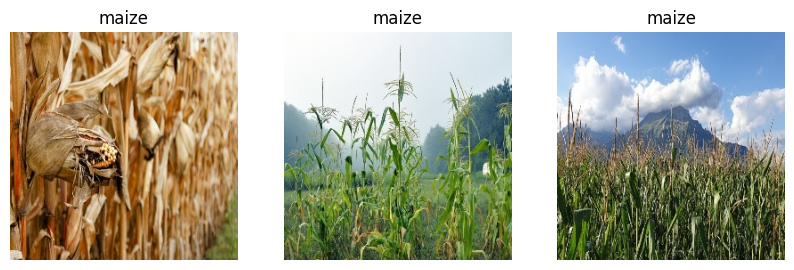

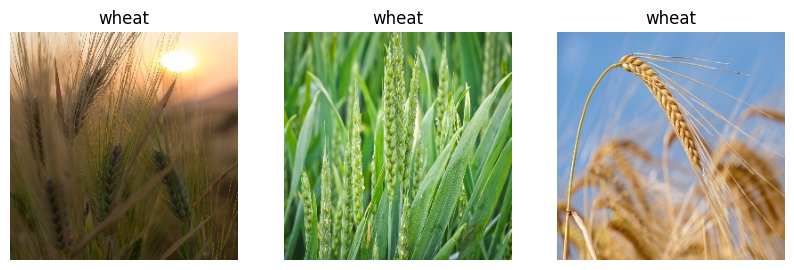

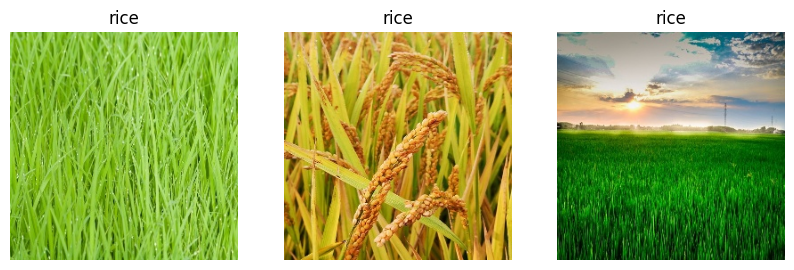

In [23]:
# List of unique crop types
unique_crop_types = df_testing['CropType'].unique()

# Visualize 3 images from each class
num_images_per_class = 3
for crop_type in unique_crop_types:
    # Filter images for the current crop type
    crop_type_images = df_testing[df_testing['CropType'] == crop_type]['Image'][:num_images_per_class]

    # Plot the images
    plt.figure(figsize=(10, 4))
    for i, image_file in enumerate(crop_type_images):
        plt.subplot(1, num_images_per_class, i + 1)
        img_path = os.path.join(testing_set_folder, image_file)
        img = imread(img_path)
        plt.imshow(img)
        plt.title(f'{crop_type}')
        plt.axis('off')
    plt.show()


## Model ##


I have now prepared my training and testing sets as X_train, Y_train, X_test, Y_Test.
I now need to select a machine learning model. For image classification tasks like the classification of three crop types, convolutional neural networks (CNNs) *(2, 3)* works well.

Considering the small size of my dataset, I will do transfer learning of a pre-trained model and I will then fine-tune it to my dataset. I selected the VGG16 architecture which should be simple and effective for image classification tasks.

I have already imported all libraries, but I add a snippet here to remind myself of what is needed. Then I custom the layers of the model.

In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [25]:
# Load the base model
base_model = VGG16(include_top=False, weights='imagenet',input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Custom
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
predictions = Dense(3, activation='softmax')(x)


# Compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


I customise the layer.
- Number of units of the dense layer as 512 since my data set is small.
- Added  the Global average pooling for reducing the spatial dimensions of the tensor.
- I added Dropout layers after the first dense layers to introduce regularization. This helps prevent overfitting.
- EarlyStopping is used to monitor the validation loss. Training will stop if the validation loss does not improve for a specified number of epochs (5)

The next line is used to compile model, preparing it for training. It specifies the optimizer, loss function, and metrics to be used during training.

In [28]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train,  # training images
    y_train,  #  training labels
    epochs=20,  # Number of epochs
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    batch_size=16
)


Epoch 1/20
31/31 [==============================] - 525s 17s/step - loss: 0.9839 - accuracy: 0.5224 - val_loss: 0.8249 - val_accuracy: 0.6327
Epoch 2/20
31/31 [==============================] - 522s 17s/step - loss: 0.8076 - accuracy: 0.6531 - val_loss: 0.7388 - val_accuracy: 0.7265
Epoch 3/20
31/31 [==============================] - 538s 18s/step - loss: 0.7281 - accuracy: 0.6837 - val_loss: 0.6961 - val_accuracy: 0.7143
Epoch 4/20
31/31 [==============================] - 526s 17s/step - loss: 0.6541 - accuracy: 0.7388 - val_loss: 0.7259 - val_accuracy: 0.6980
Epoch 5/20
31/31 [==============================] - 486s 16s/step - loss: 0.6243 - accuracy: 0.7510 - val_loss: 0.5994 - val_accuracy: 0.7510
Epoch 6/20
31/31 [==============================] - 539s 18s/step - loss: 0.5659 - accuracy: 0.7694 - val_loss: 0.5839 - val_accuracy: 0.7755
Epoch 7/20
31/31 [==============================] - 493s 16s/step - loss: 0.5324 - accuracy: 0.7959 - val_loss: 0.5553 - val_accuracy: 0.7796
Epoch 

I want to visualise how well the model performed in terms of accuracy and loss

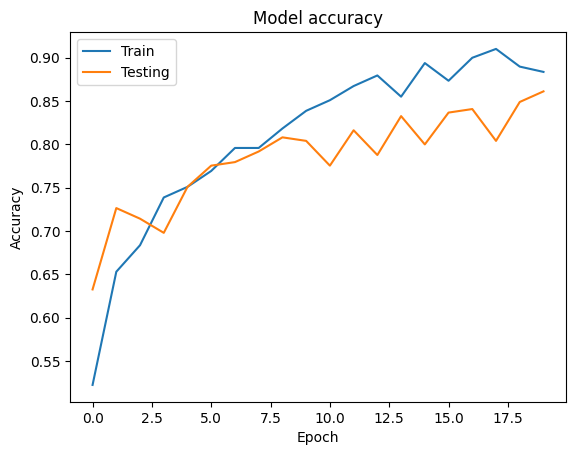

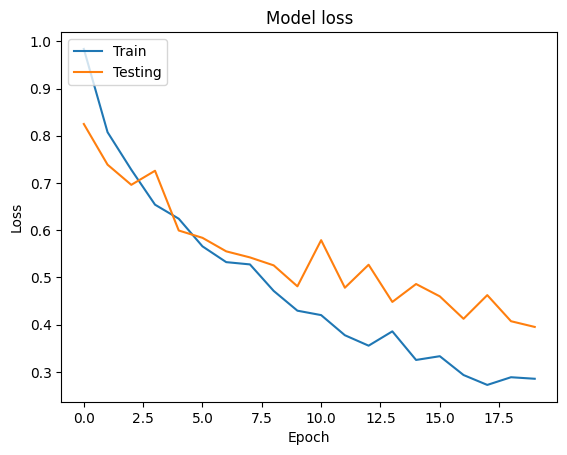

In [29]:
# Plot training & testing accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Testing'], loc='upper left')
plt.show()

# Plot training & testing loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Testing'], loc='upper left')
plt.show()


The training loss and accuracy improve over the epochs, the validation loss and accuracy also improve - the model is performing well to unseen data. The learning curve is gradual.
There is no significant gap between training and validation performace, which should be a sign of no overfitting.
The final validation accuracy is approximately 83%.

# Evaluation

I will now evaluate the performance of the model on a separate dataset. For this purpose, I have taken available data from [Kaggle](https://www.kaggle.com/datasets/mdwaquarazam/agricultural-crops-image-classification) and extracted the images for the maize, wheat and rice crop types. I have loaded the new folder 'Validation' on my GitHub.
This should help evaluate how well the model generalises to unseen data.

In [30]:
# Path to my cloned GitHub repository
repo_path = '/content/Machine-Learning'

# Folder containing validation images
input_folder = os.path.join(repo_path, 'Validation')

# List all image files in the folder
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Print the total number of images
print("The total number of images is:", len(image_files))


The total number of images is: 85


The total number of images in the validation folder is 85. The images will now be resized and normalised like the previous sets.
I will now assign labels according to crop type.

In [31]:
# Path to my validation folder
validation_folder = '/content/Machine-Learning/Validation'

# List all files in the validation folder
image_files_validation = os.listdir(validation_folder)

# Extract crop type information from filenames
crop_types_validation = [file.split()[0] for file in image_files_validation]

# Create a DataFrame with image names and corresponding crop types
df_validation = pd.DataFrame({"Image": image_files_validation, "CropType": crop_types_validation})

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape the crop types array and fit the encoder
crop_types_reshaped = df_validation["CropType"].values.reshape(-1, 1)
encoder.fit(crop_types_reshaped)

# One-hot encode the crop types
one_hot_encoded_validation = encoder.transform(crop_types_reshaped)

# Add one-hot encoded columns to the DataFrame
df_encoded_validation = pd.concat([df_validation, pd.DataFrame(one_hot_encoded_validation, columns=encoder.get_feature_names_out(["CropType"]))], axis=1)

# Load and preprocess the images for the validation
images_validation = []
for image_file in df_validation["Image"]:
    image_path_validation = os.path.join(validation_folder, image_file)
    img_validation = load_img(image_path_validation, target_size=(256, 256))
    img_array_validation = img_to_array(img_validation)
    img_array_validation /= 255.0  # Normalize to [0, 1]
    images_validation.append(img_array_validation)

X_val = np.array(images_validation)
y_val = df_encoded_validation.iloc[:, 2:].values  # Assuming one-hot encoded columns start from the third column

# Display the result for the validation set
print(df_encoded_validation)


                         Image CropType  CropType_maize  CropType_rice  \
0    maize validation  (8).jpg    maize             1.0            0.0   
1    rice validation  (15).jpg     rice             0.0            1.0   
2   maize validation  (1).jpeg    maize             1.0            0.0   
3    rice validation  (16).jpg     rice             0.0            1.0   
4     rice validation  (1).png     rice             0.0            1.0   
..                         ...      ...             ...            ...   
80  maize validation  (6).jpeg    maize             1.0            0.0   
81   rice validation  (5).jpeg     rice             0.0            1.0   
82    rice validation  (9).jpg     rice             0.0            1.0   
83  wheat validation  (20).jpg    wheat             0.0            0.0   
84  wheat validation  (10).jpg    wheat             0.0            0.0   

    CropType_wheat  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4     

The validation images have now been resized, normalised and encoded. I can now test the performance of my model on this new dataset.

In [30]:
history = model.fit(
    X_train,  # training images
    y_train,  # training labels
    epochs=10,  # Number of epochs
    validation_data=(X_val, y_val),  #validation data
    batch_size=8
)

# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(X_val, y_val)

Epoch 1/10
62/62 [==============================] - 467s 8s/step - loss: 1.0203 - accuracy: 0.4837 - val_loss: 0.7962 - val_accuracy: 0.6235
Epoch 2/10
62/62 [==============================] - 462s 7s/step - loss: 0.7778 - accuracy: 0.6714 - val_loss: 0.6816 - val_accuracy: 0.7059
Epoch 3/10
62/62 [==============================] - 462s 7s/step - loss: 0.7419 - accuracy: 0.6796 - val_loss: 0.8736 - val_accuracy: 0.6471
Epoch 4/10
62/62 [==============================] - 444s 7s/step - loss: 0.6683 - accuracy: 0.7347 - val_loss: 0.9390 - val_accuracy: 0.5529
Epoch 5/10
62/62 [==============================] - 461s 7s/step - loss: 0.5887 - accuracy: 0.7633 - val_loss: 0.6302 - val_accuracy: 0.6706
Epoch 6/10
62/62 [==============================] - 462s 7s/step - loss: 0.5166 - accuracy: 0.8020 - val_loss: 0.8665 - val_accuracy: 0.6000
Epoch 7/10
62/62 [==============================] - 461s 7s/step - loss: 0.4859 - accuracy: 0.7980 - val_loss: 0.7086 - val_accuracy: 0.6706
Epoch 8/10
62

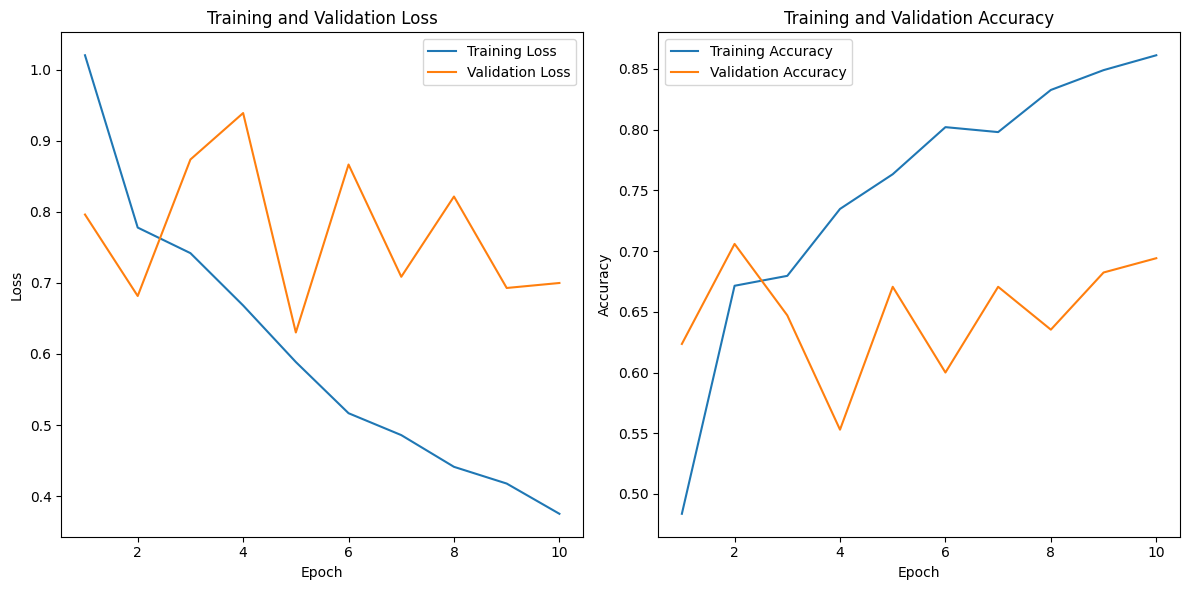

In [32]:
# Extract training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


The training and validation accuracies show an increasing trend, which is a positive sign.
The training loss is decreasing, indicating that the model is improving its ability to fit the training data. Early stopping is triggered, and training stops after the 8th epoch out of 10. .

## Discussion

The training and validation results provide insights into the performance of the model over the 20 epochs. As training progresses, accuracy climbs to 92% and validation accuracy also exhibits a positive trend, reaching 83%, indicating that the model generalizes well to unseen data.

Following the application of the model to the validation dataset, an observable pattern emerges, indicating effective learning from the training data. However, there is potential for further enhancements. Notably, the relatively smaller size of the validation set compared to the training set presents a challenge in evaluating the model's ability to generalize. This difference in size could lead to increased sensitivity in evaluation metrics, such as accuracy and loss, due to the limited number of samples available for validation.

To ensure robust generalization, further refinements and fine-tuning may be necessary in subsequent iterations, with a focus on addressing potential overfitting concerns.
Recognizing these points paves the way for making the model even better, emphasizing the importance of a balanced and representative validation set for a comprehensive evaluation of the model's efficacy in distinguishing between the three crop types.

Future Work:
- Address overfitting concerns through hyperparameter tuning.
- Enhance generalization by expanding and diversifying the validation set
- Explore transfer learning with other pre-trained models for comparison.

## References

- Kaggle Dataset for Validation
https://www.kaggle.com/datasets/mdwaquarazam/agricultural-crops-image-classification




1.   Karunathilake EMBM, Le AT, Heo S, Chung YS, Mansoor S. The Path to Smart Farming: Innovations and Opportunities in Precision Agriculture. Agriculture. 2023; 13(8):1593. https://doi.org/10.3390/agriculture13081593
2.   Krishnaswamy Rangarajan, A., Purushothaman, R. Disease Classification in Eggplant Using Pre-trained VGG16 and MSVM. Sci Rep 10, 2322 (2020). https://doi.org/10.1038/s41598-020-59108-x
3. Sunil G C, Yu Zhang, Cengiz Koparan, Mohammed Raju Ahmed, Kirk Howatt, Xin Sun. Weed and crop species classification using computer vision and deep learning technologies in greenhouse conditions,
Journal of Agriculture and Food Research,
Volume 9, 2022, 100325, ISSN 2666-1543,
https://doi.org/10.1016/j.jafr.2022.100325.

